# importing library

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
from numpy import nan
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
# function to get read the csv file

def create_dataframe(filepath):
    test = pd.read_csv(filepath) # here the given csv file is reading
    return test

filepath = 'E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv'
initial_dataframe = create_dataframe(filepath)

In [49]:
# function for converting timestamp to unixtime and return the ready dataframe

def conversion_timestamp_to_unixtime(initial_dataframe):
    ''' now conversion of timestamp to unixtime will start. In the csv file the column name of
    timestamp is longtime.'''
    
    longTime = initial_dataframe.loc[0:,['longTime']]
    longTime = longTime.as_matrix()
    a = []
    date_time_array = []
    for k in longTime:
        a = np.append(a,k)
    str_time = []
    correct_longtime = []
    datetime_time = []
    count = 0
    
    for b in a:
        b = int(b) # make plain integer
        str_b = str(b)
        c = str_b[-3:]
        new_str_b = str_b.replace(c, '',1)
        new_str_b_time = int(new_str_b)
        correct_longtime.append(new_str_b_time)
        now_time = datetime.datetime.fromtimestamp(new_str_b_time)
        convert_time = now_time.strftime('%Y-%m-%d %H:%M')
        str_time.append(convert_time)
    test_new = initial_dataframe.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added
    test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')
    test_new = test_new.drop(['longTime','stringTime','correct_longtime'], axis=1)
    
    return test_new

test_new = conversion_timestamp_to_unixtime(initial_dataframe)

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [5]:
# # It will print the type of value of each column
# long_time = test_new.correct_longtime
# print(type(long_time))
# string_time = test_new.stringTime
# print(type(string_time))

In [6]:
# if you want to ceate some datetime column in different format then you need stringtime(maybe).
# then in the previous conversion_timestamp_to_unixtime function just return stringtime

# test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')
# test_new['dateTime_column'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [7]:
# making dateTime column as a index for the test_new panda dataframe
# test_new = test_new.set_index('dateTime')

In [50]:
test_new.head()

,row ID,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,...,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,dateTime
0,Row0,74.451979,19.111606,98.371549,18.819155,93.337524,69.969526,95.445534,7.802471,57.766387,...,92.632593,44.620461,22.338103,75.685755,73.945394,0.000000,0.000000,0.000000,0.000000,2019-04-15 08:52:00
1,Row1,73.933103,18.088026,98.186038,18.943335,92.869960,69.969526,95.445534,12.856953,58.231774,...,82.082055,53.182296,26.967692,75.685755,66.649583,56.385432,68.734584,9.127668,2.275890,2019-04-15 08:51:00
2,Row2,73.471742,25.843589,98.371549,33.166077,92.343799,69.969526,95.628479,21.591973,58.231774,...,82.098144,53.029243,26.851837,75.685755,66.587330,56.402658,68.853203,9.136596,2.275735,2019-04-15 08:50:00
3,Row3,73.010381,27.772137,98.371549,35.991205,91.876236,69.850105,95.607810,19.492370,58.231774,...,82.074011,53.015226,26.266369,75.685755,66.373907,56.527297,69.391059,9.138625,2.281882,2019-04-15 08:49:00
4,Row4,72.549020,18.402556,98.186038,19.591687,91.408672,69.969526,95.607810,8.014898,58.697162,...,82.078296,53.172932,26.605640,75.685755,66.529224,56.640964,69.299560,9.121256,2.269317,2019-04-15 08:48:00


In [51]:
# # multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2','RWWIHOB_HWT0'
# #                            ,'RWWIHOB_MWT0']#rmse error 1.99

# # multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
# #                              'AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.38

# #RWDAKRWRS8V0
# # 'AEDAHO_T8_V2','AEWIHO_T8AV2',
# multivariate_column_label = ['dateTime_column','DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
#                              'AEDATZ_TZCP2','AEDATZKA_8P0','AEDATZ_HO_P1','AEDAHO_T9_V2',
#                              'RWWIHOB_HWT0','RWWIHOB_MWT0','AEWIHO_T9AV2'] #rmse error 1.94
# size_column = len(multivariate_column_label)
# print(size_column)

# print(type(multivariate_column_label))

In [52]:
# in this csv file time are order in present to past. Below function will alter it
# here also start and end row has passsed.
# If you want to pass your own desired column name also can pass using multivariate column label.
# take a look at the previous cell

def alter_time(dataframe, start_pos, end_pos):
#     multivariate_data=test_new.iloc[start_pos:end_pos][multivariate_column_label] # comment out this line if you pass column label
    multivariate_data=test_new.iloc[start_pos:end_pos][:]
    multivariate_data=multivariate_data.loc[::-1]
    
    return multivariate_data

start_pos = 0
end_pos = 25000
multivariate_data = alter_time(test_new, start_pos, end_pos)
multivariate_data.head()

,row ID,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,...,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,dateTime
24999,Row24999,72.030143,21.542766,94.083085,22.656925,82.875638,67.650387,95.811415,11.299942,60.849423,...,92.507129,44.620461,28.127074,82.825607,78.104338,67.050713,75.017129,0.385938,5.503583,2019-03-11 03:14:00
24998,Row24998,72.491504,26.431470,94.083085,27.250685,82.875638,67.530966,95.648382,15.316148,60.849423,...,92.521725,44.620461,30.234661,82.718776,78.744878,67.904313,74.995147,0.391870,5.464381,2019-03-11 03:15:00
24997,Row24997,72.952865,16.340439,94.083085,9.402699,83.810765,67.501116,95.648382,7.900882,60.384036,...,92.484799,44.620461,33.680038,82.812397,79.820670,69.482925,75.118191,0.391758,5.461172,2019-03-11 03:16:00
24996,Row24996,73.414226,25.111296,94.247637,20.460754,84.336621,67.501116,95.648382,8.682349,60.384036,...,92.458005,44.620461,36.388113,82.644399,80.584952,69.763910,74.112424,0.396539,5.446945,2019-03-11 03:17:00
24995,Row24995,73.875587,26.183628,94.247637,26.243646,84.862783,67.635740,95.486096,16.656556,60.384036,...,92.467179,44.620461,35.372044,82.999752,80.398505,69.927938,74.680827,0.390438,5.434438,2019-03-11 03:18:00


In [53]:
multivariate_data_copy = multivariate_data.copy()

In [54]:
# function for changing column order. pass dataframe, column name, which order you want to set for the column
def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]

# take the following code in the main file
last_position_of_dataframe = int(multivariate_data_copy.shape[-1]-1)
index_array=[0,last_position_of_dataframe]
# index_array = np.array(index_array)
req_column_name = ['dateTime','AEWIHO_T9AV2']
for i in range(len(index_array)):
    print(i)
    print(index_array[i],'\t',req_column_name[i])
    column_name = req_column_name[i]
    index_position = index_array[i]
    
    multivariate_data_changed_order = change_column_order(multivariate_data_copy,column_name,index_position)
    multivariate_data_copy = multivariate_data_changed_order

0
0 	 dateTime
1
4219 	 AEWIHO_T9AV2


In [55]:
multivariate_data_changed_order.head()

,dateTime,row ID,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,...,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,AEWIHO_T9AV2
24999,2019-03-11 03:14:00,Row24999,72.030143,21.542766,94.083085,22.656925,82.875638,67.650387,95.811415,11.299942,...,92.507129,44.620461,28.127074,82.825607,78.104338,67.050713,75.017129,0.385938,5.503583,79.178306
24998,2019-03-11 03:15:00,Row24998,72.491504,26.431470,94.083085,27.250685,82.875638,67.530966,95.648382,15.316148,...,92.521725,44.620461,30.234661,82.718776,78.744878,67.904313,74.995147,0.391870,5.464381,81.659117
24997,2019-03-11 03:16:00,Row24997,72.952865,16.340439,94.083085,9.402699,83.810765,67.501116,95.648382,7.900882,...,92.484799,44.620461,33.680038,82.812397,79.820670,69.482925,75.118191,0.391758,5.461172,86.055430
24996,2019-03-11 03:17:00,Row24996,73.414226,25.111296,94.247637,20.460754,84.336621,67.501116,95.648382,8.682349,...,92.458005,44.620461,36.388113,82.644399,80.584952,69.763910,74.112424,0.396539,5.446945,87.113691
24995,2019-03-11 03:18:00,Row24995,73.875587,26.183628,94.247637,26.243646,84.862783,67.635740,95.486096,16.656556,...,92.467179,44.620461,35.372044,82.999752,80.398505,69.927938,74.680827,0.390438,5.434438,87.266264


In [73]:
# the function will do the following task
# if the blast furnace signal for turbine 9 is zero then no work will be happened.
# so, remove all the rows where this value will be zero

def drop_zero_value_row_of_blast_furnace_signal(dataframe, blast_furnace_signal):
    count = []
    for idx_blast_furnace, val_blast_furnace in enumerate(multivariate_data_changed_order[blast_furnace_signal]):
        if val_blast_furnace != 100 :
            count = np.append(count,idx_blast_furnace)

    if count.size > 0:
        dataframe_1 = multivariate_data_changed_order.drop(count,axis=0) # axis= 0 means row indiated. 1 means column indicated
    else:
        dataframe_1 = multivariate_data_changed_order
    dataframe_1 = dataframe_1.drop([blast_furnace_signal], axis=1) # dropping the column. because all value are same   
    return dataframe_1
blast_furnace_signal = 'DEWIHOBT9_I0'

dataframe_no_zero_value_blast_furnace = drop_zero_value_row_of_blast_furnace_signal(multivariate_data_changed_order,
                                                                                    blast_furnace_signal)

In [75]:
# checking if any column has zero value or not. If YES then replace zero with NAN and drop the row

# a = dataframe_no_zero_value_blast_furnace[blast_furnace_signal].isnull().sum()
# print(a)

def drop_nan_value(dataframe):
    for index,column in enumerate(dataframe):
        nan_catcher = dataframe[column].isnull().sum()
        if nan_catcher !=0:
            multivariate_data_drop_zero = dataframe[column].replace(0,nan)
            multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)
#             print(column,' has total',nan_catcher, 'nan valu')
        else:
            multivariate_data_drop_zero = dataframe
#             print(column,' is free from nan value. look it has: ', nan_catcher,' value')
            
    return multivariate_data_drop_zero

multivariate_data_drop_zero = drop_nan_value(dataframe_no_zero_value_blast_furnace)

In [19]:
# # as this dataframe has created by taking value for each minute. 
# # so it should be checked is there every minute is present or not.
# # for doing this a function to do resampling for '1 min' and then fill the new row if has created with interpolation
# # will be added. But if the new dataframe contains more than 20 percent rows of the previous dataframe the new one will
# # not be used

# def resample_and_interpolation(dataframe,resampling_term,interpolation_way):
    
#     dataframe = dataframe.set_index('dateTime')
#     multivariate_data_drop_zero_resample = dataframe.resample(resampling_term).mean()
#     multivariate_data_drop_zero_interpolate = multivariate_data_drop_zero_resample.interpolate(interpolation_way)
    
#     return multivariate_data_drop_zero_interpolate


# resampling_term = '1min'
# interpolation_way = 'linear'
# multivariate_data_drop_zero_interpolate = resample_and_interpolation(multivariate_data_drop_zero,resampling_term,interpolation_way)
# # multivariate_data_drop_zero_resample = multivariate_data_drop_zero.resample('1min').mean()
# # multivariate_data_drop_zero_interpolate = multivariate_data_drop_zero_resample.interpolate('linear')

In [78]:
multivariate_data_drop_zero.head()

,dateTime,row ID,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,...,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,AEWIHO_T9AV2
24999,2019-03-11 03:14:00,Row24999,72.030143,21.542766,94.083085,22.656925,82.875638,67.650387,95.811415,11.299942,...,92.507129,44.620461,28.127074,82.825607,78.104338,67.050713,75.017129,0.385938,5.503583,79.178306
24998,2019-03-11 03:15:00,Row24998,72.491504,26.431470,94.083085,27.250685,82.875638,67.530966,95.648382,15.316148,...,92.521725,44.620461,30.234661,82.718776,78.744878,67.904313,74.995147,0.391870,5.464381,81.659117
24997,2019-03-11 03:16:00,Row24997,72.952865,16.340439,94.083085,9.402699,83.810765,67.501116,95.648382,7.900882,...,92.484799,44.620461,33.680038,82.812397,79.820670,69.482925,75.118191,0.391758,5.461172,86.055430
24996,2019-03-11 03:17:00,Row24996,73.414226,25.111296,94.247637,20.460754,84.336621,67.501116,95.648382,8.682349,...,92.458005,44.620461,36.388113,82.644399,80.584952,69.763910,74.112424,0.396539,5.446945,87.113691
24995,2019-03-11 03:18:00,Row24995,73.875587,26.183628,94.247637,26.243646,84.862783,67.635740,95.486096,16.656556,...,92.467179,44.620461,35.372044,82.999752,80.398505,69.927938,74.680827,0.390438,5.434438,87.266264


In [79]:
target_c = 'AEWIHO_T9AV2'
array_12 = []
for index_12, value_12 in enumerate(multivariate_data_drop_zero[target_c]):
    if value_12 == 0:
#         dataframe_2 = multivariate_data_drop_zero.drop(multivariate_data_drop_zero.index[index_12], inplace=True)
        array_12 = np.append(array_12, index_12)
    else:
        pass

In [80]:
len(array_12)

110

In [81]:
# print(multivariate_data_drop_zero.loc[[24227]])
multivariate_data_drop_zero_copy = multivariate_data_drop_zero.copy()
multivariate_data_drop_zero_copy.head()

,dateTime,row ID,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,...,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,AEWIHO_T9AV2
24999,2019-03-11 03:14:00,Row24999,72.030143,21.542766,94.083085,22.656925,82.875638,67.650387,95.811415,11.299942,...,92.507129,44.620461,28.127074,82.825607,78.104338,67.050713,75.017129,0.385938,5.503583,79.178306
24998,2019-03-11 03:15:00,Row24998,72.491504,26.431470,94.083085,27.250685,82.875638,67.530966,95.648382,15.316148,...,92.521725,44.620461,30.234661,82.718776,78.744878,67.904313,74.995147,0.391870,5.464381,81.659117
24997,2019-03-11 03:16:00,Row24997,72.952865,16.340439,94.083085,9.402699,83.810765,67.501116,95.648382,7.900882,...,92.484799,44.620461,33.680038,82.812397,79.820670,69.482925,75.118191,0.391758,5.461172,86.055430
24996,2019-03-11 03:17:00,Row24996,73.414226,25.111296,94.247637,20.460754,84.336621,67.501116,95.648382,8.682349,...,92.458005,44.620461,36.388113,82.644399,80.584952,69.763910,74.112424,0.396539,5.446945,87.113691
24995,2019-03-11 03:18:00,Row24995,73.875587,26.183628,94.247637,26.243646,84.862783,67.635740,95.486096,16.656556,...,92.467179,44.620461,35.372044,82.999752,80.398505,69.927938,74.680827,0.390438,5.434438,87.266264


In [86]:
multivariate_data_drop_zero_copy = multivariate_data_drop_zero.copy()
if array_12.size > 0:
    dataframe_2 = multivariate_data_drop_zero_copy.drop(array_12,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    dataframe_2 = multivariate_data_drop_zero_copy

KeyError: '[24223. 24224. 24231.] not found in axis'

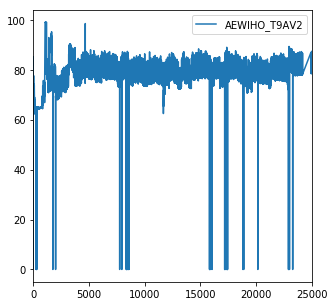

In [83]:
multivariate_data_drop_zero.iloc[0:].plot(y = multivariate_data_drop_zero.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(5,5)

In [88]:
# drop all of the column who has always same value

multivariate_data_drop_column_with_same_value = multivariate_data_drop_zero.drop(
    multivariate_data_drop_zero.std()[(multivariate_data_drop_zero.std() == 0)].index, axis=1)

In [89]:
print(multivariate_data_drop_zero.shape)
print(multivariate_data_drop_column_with_same_value.shape)

(24240, 4219)
(24240, 2903)


In [90]:
path = 'E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/univariate_data_for_prediction/figure_from_code'
multivariate_data_drop_column_with_same_value.to_csv(path+'/'+'file_no_column_with_unique_value.csv')

In [91]:
multivariate_data_drop_column_with_same_value.head()

,dateTime,row ID,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,...,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,AEWIHO_T9AV2
24999,2019-03-11 03:14:00,Row24999,72.030143,21.542766,94.083085,22.656925,82.875638,67.650387,95.811415,11.299942,...,92.507129,44.620461,28.127074,82.825607,78.104338,67.050713,75.017129,0.385938,5.503583,79.178306
24998,2019-03-11 03:15:00,Row24998,72.491504,26.431470,94.083085,27.250685,82.875638,67.530966,95.648382,15.316148,...,92.521725,44.620461,30.234661,82.718776,78.744878,67.904313,74.995147,0.391870,5.464381,81.659117
24997,2019-03-11 03:16:00,Row24997,72.952865,16.340439,94.083085,9.402699,83.810765,67.501116,95.648382,7.900882,...,92.484799,44.620461,33.680038,82.812397,79.820670,69.482925,75.118191,0.391758,5.461172,86.055430
24996,2019-03-11 03:17:00,Row24996,73.414226,25.111296,94.247637,20.460754,84.336621,67.501116,95.648382,8.682349,...,92.458005,44.620461,36.388113,82.644399,80.584952,69.763910,74.112424,0.396539,5.446945,87.113691
24995,2019-03-11 03:18:00,Row24995,73.875587,26.183628,94.247637,26.243646,84.862783,67.635740,95.486096,16.656556,...,92.467179,44.620461,35.372044,82.999752,80.398505,69.927938,74.680827,0.390438,5.434438,87.266264


In [93]:
dataframe_to_train = multivariate_data_drop_column_with_same_value.copy()
dataframe_to_train_time_index = dataframe_to_train.set_index('dateTime')
dataframe_to_train_time_index = dataframe_to_train_time_index.drop(['row ID'], axis=1)
dataframe_to_train_time_index.head()

,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,...,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,AEWIHO_T9AV2
dateTime,,,,,,,,,,,,,,,,,,,,,
2019-03-11 03:14:00,72.030143,21.542766,94.083085,22.656925,82.875638,67.650387,95.811415,11.299942,60.849423,100.000000,...,92.507129,44.620461,28.127074,82.825607,78.104338,67.050713,75.017129,0.385938,5.503583,79.178306
2019-03-11 03:15:00,72.491504,26.431470,94.083085,27.250685,82.875638,67.530966,95.648382,15.316148,60.849423,83.088535,...,92.521725,44.620461,30.234661,82.718776,78.744878,67.904313,74.995147,0.391870,5.464381,81.659117
2019-03-11 03:16:00,72.952865,16.340439,94.083085,9.402699,83.810765,67.501116,95.648382,7.900882,60.384036,95.667996,...,92.484799,44.620461,33.680038,82.812397,79.820670,69.482925,75.118191,0.391758,5.461172,86.055430
2019-03-11 03:17:00,73.414226,25.111296,94.247637,20.460754,84.336621,67.501116,95.648382,8.682349,60.384036,93.447307,...,92.458005,44.620461,36.388113,82.644399,80.584952,69.763910,74.112424,0.396539,5.446945,87.113691
2019-03-11 03:18:00,73.875587,26.183628,94.247637,26.243646,84.862783,67.635740,95.486096,16.656556,60.384036,76.483634,...,92.467179,44.620461,35.372044,82.999752,80.398505,69.927938,74.680827,0.390438,5.434438,87.266264


In [206]:
# function which will return dataframe which has only best feature column using SelectKBest

def feature_selection_with_selectKbest(dataframe,max_best_number):
    train_input = dataframe.iloc[:,:-1]
    train_output = dataframe.iloc[:,-1]
    train_output = train_output.to_frame()
    
    X, y = train_input, train_output
    X = X.astype(int)
    y = y.astype(int)
    
    bestfeatures = SelectKBest(score_func=chi2, k=2)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#     print(featureScores.nlargest(20,'Score'))  #print 10 best features
    d = featureScores.nlargest(max_best_number,'Score')
    
    e = []
    for i,v in enumerate(d['Specs']):
        e = np.append(e,v)
    
    e = np.append(e,dataframe.columns[-1])
    final_dataframe = dataframe.iloc[:][e]
    
    return final_dataframe

final_dataframe = feature_selection_with_selectKbest(dataframe_to_train_time_index,20)
    

In [209]:
# graph_array =[]
# for j,k in d.iterrows():
#     graph_array = np.append(graph_array,j)

# for i in range(len(graph_array)):
#     dataframe_to_train_time_index.iloc[0:].plot(y = dataframe_to_train_time_index.columns[i], use_index=True)
#     plt.rcParams['figure.figsize'] =(5,5)

In [212]:
def pearson_correlation(dataframe):
    correlation = dataframe.corr()
    return correlation

correlated_dataframe = pearson_correlation(dataframe_to_train_time_index)
print(correlated_dataframe.shape)

(2901, 2901)


In [ ]:
correlated_dataframe.to_csv(path+'/'+'correlation_dataframe_where_no_column_with_same_value.csv')

In [ ]:
# multivariate_data_drop = multivariate_data_2.drop([multivariate_data_2.columns[1],multivariate_data_2.columns[2],
#                                                   multivariate_data_2.columns[-3],multivariate_data_2.columns[-2]], axis=1)

In [ ]:
# multivariate_data_drop.columns.get_loc("AEWIHO_T9AV2")

In [ ]:
# multivariate_data_drop.columns[-1]

In [ ]:
# multivariate_data_drop.tail()

In [ ]:
# multivariate_data_drop.loc[4]['AEAGHOAWE2T1']

In [ ]:
# multivariate_data_drop_dummy = multivariate_data_drop.set_index('dateTime')

In [ ]:
# multivariate_data_drop_dummy.head()

In [ ]:
# s.describe()

In [ ]:
# multivariate_data["a"] = pd.to_datetime(multivariate_data["dateTime_column"])

In [ ]:
# checking column type
# s = multivariate_data['dateTime_column'].dtype
# print(s)

In [ ]:
# multivariate_data["a"] = pd.to_datetime(multivariate_data["dateTime_column"])
# tr = multivariate_data.drop(multivariate_data.columns[-1], axis=1)

In [ ]:
# tr = multivariate_data_copy.copy()
# tr['Date'] = multivariate_data['dateTime'].dt.strftime('%d/%m/%Y')
# tr['Time'] = multivariate_data['dateTime'].dt.strftime('%H:%M:%S')

# date_type = tr['Date'].dtype
# time_type = tr['Time'].dtype
# print('date_type: ', date_type)
# print('time_type: ',time_type)

In [ ]:
# # converting previously created date and time column to datetime type
# tr['Date'] = pd.to_datetime(tr['Date'])
# tr['Time'] = pd.to_datetime(tr['Time'])

# date_type = tr['Date'].dtype
# time_type = tr['Time'].dtype

# print("to observe the difference look in the previous cell's output")
# print('date_type: ', date_type)
# print('time_type: ',time_type)

In [ ]:
# e1 = tr['Date'].dtype
# print(type(e1))

In [ ]:
# it will return a column with weekday name
# tr['Weekday_name'] = tr.index.weekday_name

In [ ]:
# It will return a column with number associated with DAY. like monday =0, Tuesday=1 and so on
# tr['weekday'] = multivariate_data['dateTime_column'].apply(lambda x: x.weekday())

In [ ]:
# tr['TypeofDAY'] = np.where(multivariate_data['dateTime_column'].dt.dayofweek < 5, 'Weekday', 'weekend') # if the associated number less than 5 then weekend, otherwise weekday
# tr['TypeofDAY_number'] = np.where(multivariate_data['dateTime_column'].dt.dayofweek < 5, 1, 0) # 1 for weekday, 0 for weekend

In [ ]:
# make all the time(without date) to numeric value
# tr['numric_time'] = pd.to_timedelta(tr['Time']).dt.total_seconds()

In [ ]:
# tr.head()

In [ ]:
# tr.columns

In [ ]:
# # this code will count how many date is came from 11th march
# my_array=[]
# count = 0

# for index_2, value_2 in tr.iterrows():
#     for i_2 , v_2 in enumerate(value_2):
#         if i_2 == 12 and v_2 != 0.0:
# #             print(v_2)
#             v_2_split = v_2.split('/')
#             if v_2_split[0] == '11' and v_2_split[1]=='03' :
#                 my_array = np.append(my_array,index_2)
# #                 print(v_2)
# #                 print(count)
            
#                 count+=1
# # print('-------',count)
# print(len(my_array))

In [ ]:
# modification of the previus code
# tr_33 = tr.reset_index()
# df2 = pd.DataFrame()
# for idx , v_2 in enumerate(tr_33['Date']):
# #     print(idx)
#     if v_2 != 0.0:
#         v_2_split = v_2.split('/')
#         if v_2_split[0] == '11' and v_2_split[1]=='03':
#             required_dataframe = pd.DataFrame(tr_33.iloc[idx:(idx+1),:], columns=tr_33.columns)
#             df2 = pd.concat([df2, required_dataframe], axis=0)

In [ ]:
# vvv = tr.groupby('TypeofDAY')
# vvv.head(1)

# tr['AEWIHO_T9AV2'].describe()

In [ ]:
# very efficient to group all the value with respect to column and store them in a dictionary
# necessary for plotting graph

# dict_of_day_type = {k:v for k,v in tr.groupby('TypeofDAY')}
# # plt.ioff()
# key_value = collections.OrderedDict(dict_of_day_type)

# for k_1 in key_value:
#     print(k_1)
#     my_week = dict_of_day_type[k_1]
#     my_week.iloc[:].plot(y=['AEWIHO_T9AV2'])
#     describe = my_week['AEWIHO_T9AV2'].describe()
#     RMSE = 2
#     textstr = 'describe=%.2f\nRMSE=%.2f\n'%(1, 2)
#     plt.text(0.5, 0.5, textstr, fontsize=14)
#     plt.savefig(path_1+str(k_1)+'_'+'.jpg')
# #     plt.close()

In [ ]:
# dict_of_dates = {k: v for k, v in tr.groupby('Date')}

# import collections
# prices  = collections.OrderedDict(dict_of_dates)

# path_1 = 'E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/univariate_data_for_prediction/figure_from_code/graph_of_target_day_wise/'

# for k in prices:
#     k_sp = k.replace('/','_')
#     my_f = dict_of_dates[k]
#     my_f.iloc[:].plot(y=['AEWIHO_T9AV2'])
#     plt.savefig(path_1+str(k_sp)+'_'+'date.jpg')
#     plt.ioff()
# #     print(my_f.iloc[:]['AEWIHO_T9AV2'])
    
    

In [ ]:
# e = 'weekend'
# print(type(e))
# for index_1, value_1 in tr.iterrows():
#     for i_1 , v_1 in enumerate(value_1):
#         if i_1 == 13 and v_1 == e:
#             d = tr.index.get_loc(index_1) #It will give the row value for the corresponding index of the dataframe
# #             print(tr.iloc[d]['Weekday_name'])
#             print(index_1)

In [ ]:
# dict_of_dates = {k: v for k, v in tr.groupby('Date')}

# import collections
# prices  = collections.OrderedDict(dict_of_dates)

# # path_1 = 'E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/univariate_data_for_prediction/figure_from_code/graph_of_target_day_wise/'

# for k in prices:
#     k_sp = k.replace('/','_')
#     print(k,'\t',k_sp)

# # import pprint
# # pprint.pprint(dict_of_dates)

In [ ]:
# # tr_group = tr.groupby(pd.Grouper(freq='1Y')).sum()
# # tr_group.head()

# tr_1 = tr['2019-03-11':'2019-03-11']
# tr_1.tail()
# print(len(tr_1))

In [ ]:
# morning_shift = tr_1.between_time('06:00', '14:00')
# day_shift = tr.between_time('14:01', '22:00')
# night_shift = tr.between_time('22:01', '05:59')

In [ ]:
# present_data.plot(y=present_data.columns['AEWIHO_T9AV2'])

In [ ]:
# pr_1 = present_data.drop(multivariate_column_label[0], axis=1)

In [ ]:
# zero_index=[]
# zero_index=np.array(zero_index)
# for index, value in pr_1.iterrows():
#     for i , v in enumerate(value):
#         if i == 0  and v == 0.0:
# #             print('index: ',index)
#             zero_index=np.append(zero_index,index)

# print('size of zero_index: ',zero_index.size)

In [ ]:
# if zero_index.size > 0:
#     pr_1_modify = pr_1.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
# else:
#     pr_1_modify = pr_1

In [ ]:
# cols = [-1,-2,-3,-4,-5,-6,-7]
# pr_1_modify_drop = pr_1_modify.drop(pr_1_modify.columns[cols], axis=1)

In [ ]:
# multivariate_data_modify = pr_1_modify_drop

# from numpy import nan
# multivariate_data_drop_zero= multivariate_data_modify.replace(0,nan)
# multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

In [ ]:
# print(multivariate_data_modify.shape)
# print(multivariate_data_drop_zero.shape)

In [ ]:
multivariate_data_drop_zero_resample = multivariate_data_drop_zero.resample('1min').mean()
multivariate_data_drop_zero_interpolate = multivariate_data_drop_zero_resample.interpolate('linear')

print('shape of multivariate_data_drop_zero_resample: ', multivariate_data_drop_zero_resample.shape)
print('shape of multivariate_data_drop_zero_interpolate: ',multivariate_data_drop_zero_interpolate.shape)

In [ ]:
# print(len(multivariate_column_label))
for idx, i in enumerate(multivariate_column_label):
    now_idx = idx+2
    
    if now_idx == len(multivariate_column_label):
        print('terminate')
        break
    print(multivariate_column_label[now_idx])
    drop_consecutive_same_value_zero = multivariate_data_drop_zero.loc[multivariate_data_drop_zero[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero[multivariate_column_label[now_idx]]]
    drop_consecutive_same_value_interpolate = multivariate_data_drop_zero_interpolate.loc[multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]]]
    


In [ ]:
print('shape of drop_consecutive_same_value_zero: ', drop_consecutive_same_value_zero.shape)
print('shape of drop_consecutive_same_value_interpolate: ', drop_consecutive_same_value_interpolate.shape)

In [ ]:
new_dataframe = drop_consecutive_same_value_zero.drop(['DEWIHOBT9_I0'], axis=1)
# new_dataframe = drop_consecutive_same_value_interpolate.drop(['DEWIHOBT9_I0'], axis=1)

In [ ]:
new_dataframe.head()

In [ ]:
# start = 0
# end = 300

# loop = int(len(new_dataframe)/300)+1
# path = 'E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/univariate_data_for_prediction/figure_from_code/fig_target_night/'

# for i in range(loop):
#     if end < len(new_dataframe):
        
#         new_dataframe.iloc[start:end].plot(y=new_dataframe.columns[-1])
        
#         plt.savefig(path+str(start)+'_night.jpg')
#         start = end
#         end = end+300
#     else:
#         start = start
#         end = len(new_dataframe)
#         new_dataframe.iloc[start:end].plot(y=new_dataframe.columns[-1])
#         plt.savefig(path+'final_'+str(len(new_dataframe))+'_night.jpg')
        
# #     plt.rcParams['figure.figsize'] =(20,10)

In [ ]:
new_dataframe.iloc[0:].plot(y = new_dataframe.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(20,20)

In [ ]:
dateRange = pd.date_range(new_dataframe.index[0],new_dataframe.index[10], freq='1min')
print(dateRange)
plt.plot(dateRange,new_dataframe.iloc[0:11,-1])
plt.xlim(dateRange[0],dateRange[-1])
plt.xticks(rotation=25)

In [ ]:
dateRange[-1]

In [ ]:
# start_1 = 700
# end_1 = start_1+300
# new_dataframe.iloc[start_1:end_1].plot(x = new_dataframe.index.format(), y=new_dataframe.columns[-1])
plt.plot(new_dataframe.iloc[0:100].index.format(), new_dataframe.iloc[0:100,-1])
plt.show()

In [ ]:
print(max(new_dataframe.iloc[start_1:end_1][new_dataframe.columns[-1]]))

print(len(new_dataframe))

In [ ]:
test_new.iloc[0:2000].plot(y=new_dataframe.columns[-1])

In [ ]:
new_dataframe.plot(y=new_dataframe.columns[-1])

In [ ]:
dataset = np.array(multivariate_data_drop_dummy)

In [ ]:
def make_dataset(dataset):
    NumberOfElements=int(len(dataset)*0.95)
    print('Number of Elements for training: ',NumberOfElements)
    print('dataset length: ',len(dataset))

    train_input=dataset[0:NumberOfElements,0:-1]
    print('train_input shape: ',train_input.shape)
    train_output=dataset[0:NumberOfElements,-1]
    print('train_output shape: ',train_output.shape)

    test_input=dataset[NumberOfElements:len(dataset),0:-1]
    print('test_input shape: ',test_input.shape)
    test_output=dataset[NumberOfElements:len(dataset),-1]
    print('test_output shape: ',test_output.shape)
    
    return train_input, train_output, test_input, test_output

train_input, train_output, test_input, test_output = make_dataset(dataset)

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [ ]:
train_model=LinearRegression(fit_intercept = True,normalize=False).fit(train_input,train_output)
print(train_model)

predicted_output=train_model.predict(test_input)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

In [ ]:
print('Slope:' ,train_model.coef_)
print('Intercept:', train_model.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

In [ ]:
plt.plot((min(test_output),max(test_output)), (min(predicted_output),max(predicted_output)))
plt.scatter(test_output,predicted_output, color = 'blue')

In [247]:
# function to make dataframe with high correlated valued column
def make_dataframe_with_high_correlated_value(main_dataframe,correlated_dataframe,target_column,
                                              correlation_threshold_value,max_value):
    
    dataframe = correlated_dataframe.reset_index()
    
    high_correlated_array_with_target = []
    for index_corr_reset, val_corr_reset in enumerate(dataframe[target_column]):
        if val_corr_reset > correlation_threshold_value and val_corr_reset < max_value:
            required_column = dataframe.loc[index_corr_reset]['index']
            if required_column != target_column:
                high_correlated_array_with_target = np.append(high_correlated_array_with_target,required_column)
            else:
                print(required_column)
                pass
            
    final_array = np.append(high_correlated_array_with_target,target_column)
    new_dataframe = main_dataframe.iloc[:][final_array]
    
    return new_dataframe

correlation_threshold_value = 0.5
max_value = 0.9
target_column = dataframe_to_train_time_index.columns[-1] # here declaring who is target column.
dataframe_high_correlation = make_dataframe_with_high_correlated_value(dataframe_to_train_time_index,correlated_dataframe,
                                                             target_column,correlation_threshold_value,max_value)

In [248]:
dataframe_high_correlation.shape

(24240, 21)

In [243]:
# new_frame_1 = new_frame.drop(['RWWIHOAG9_V0','RWWIHOBG8_V0'], axis=1)

In [249]:
def make_dataset(dataframe):
    dataset = np.array(dataframe)
    NumberOfElements=int(len(dataset)*0.98)
    print('Number of Elements for training: ',NumberOfElements)
    print('dataset length: ',len(dataset))

    train_input=dataset[0:NumberOfElements,0:-1]
    print('train_input shape: ',train_input.shape)
    train_output=dataset[0:NumberOfElements,-1]
    print('train_output shape: ',train_output.shape)

    test_input=dataset[NumberOfElements:len(dataset),0:-1]
    print('test_input shape: ',test_input.shape)
    test_output=dataset[NumberOfElements:len(dataset),-1]
    print('test_output shape: ',test_output.shape)
    
    return train_input, train_output, test_input, test_output

train_input, train_output, test_input, test_output = make_dataset(dataframe_high_correlation)
# print('train data size: ',train_data.shape,'\ntest data size: ',test_data.shape)

Number of Elements for training:  23755
dataset length:  24240
train_input shape:  (23755, 20)
train_output shape:  (23755,)
test_input shape:  (485, 20)
test_output shape:  (485,)


In [196]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import *
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor as GBR

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

In [255]:
# train_model = LinearRegression(fit_intercept = True,normalize=False).fit(train_input,train_output)
train_model = ExtraTreesRegressor(n_estimators=100, random_state=0)
# train_model = GBR()
train_model.fit(train_input, train_output)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                    oob_score=False, random_state=0, verbose=0,
                    warm_start=False)

In [256]:
print(train_model)
predicted_output=train_model.predict(test_input)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                    oob_score=False, random_state=0, verbose=0,
                    warm_start=False)


In [257]:
# print('Slope:' ,train_model.coef_)
# print('Intercept:', train_model.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

r_2 statistic: 0.81
Mean_absolute_error: 1.63
Mean squared error: 38.96
RMSE:  6.241760496248276


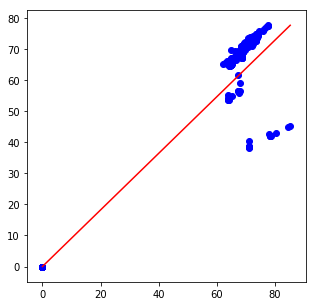

In [258]:
plt.plot((min(test_output),max(test_output)), (min(predicted_output),max(predicted_output)), color='red')
plt.scatter(test_output,predicted_output, color = 'blue')

<class 'numpy.ndarray'>


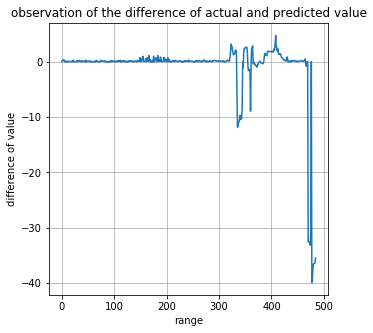

In [259]:
# try to draw a graph where I will plot only the differences between actual and predicted value.
# %matplotlib qt

difference_of_value = predicted_output - test_output
print(type(difference_of_value))

plt.plot(difference_of_value[:])
plt.title('observation of the difference of actual and predicted value')

# plt.rcParams['xtick.labelsize']=2
# plt.rcParams['ytick.labelsize']=2
# plt.tick_params(labelsize=20)
plt.ylabel('difference of value')
plt.xlabel('range')
plt.grid(b=None, which='both', axis='both')
# plt.savefig('difference_of_actual_and_predicted_value.png')
plt.show()